
## Домашняя работа
Группа: Т12О-101М-20

Студент: Гриньков Владислав Леонидович

## Валидация моделей классификации

Данные

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'data/client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,-0.889273,-0.537896,-1.959469,2
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,-1.228211,-1.375899,-1.434209,2


Найдите лучший классификатор по метрике f1-score

In [86]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

# --------- ВАШ КОД ТУТ --------
models = {
    'decision-tree': DecisionTreeClassifier,
    'gaussian-nb': GaussianNB,
    'knn': KNeighborsClassifier,
    'log-reg': LogisticRegression,
    'randomforest': RandomForestClassifier,
}
scores = {}

for model_name, model_cls in models.items():
    clf = model_cls().fit(X, y)

    y_true = y
    y_pred = clf.predict(X)
    
    scores[model_name] = f1_score(y_true, y_pred, average='weighted')


models_sorted_by_score = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
print('Scores: ')
print(f'\t|{"Model Name":^15} | {"f1-score":^30} |')
print('\t|' + '-'*16 + '|' + '-'*32 + '|')
for model_name, score in models_sorted_by_score:
    print(f'\t|{model_name:^15} | {score:^30} |')
    

print()
best_model_name, best_model_score = models_sorted_by_score[0]
print(f'Best model is {best_model_name} with f1-score = {best_model_score}')

Scores: 
	|  Model Name    |            f1-score            |
	|----------------|--------------------------------|
	| decision-tree  |              1.0               |
	| randomforest   |              1.0               |
	|      knn       |       0.979846223428313        |
	|    log-reg     |       0.979846223428313        |
	|  gaussian-nb   |       0.9498119457062514       |

Best model is decision-tree with f1-score = 1.0


## Валидация моделей линейной регрессии

Пользуясь методом .score подберите наилучшее значение степени полинома

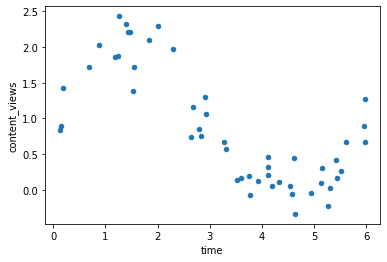

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

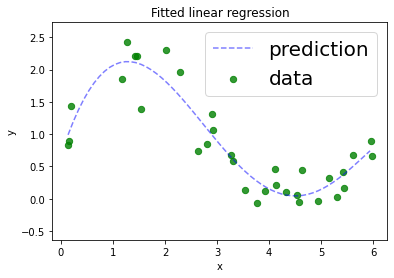

In [137]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

degree = 5

X_train_5 = generate_degrees(X_train, degree)
X_test_5 = generate_degrees(X_test, degree)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, degree)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [138]:
# --------- ВАШ КОД ТУТ --------
scores = {}

min_degree = 1
max_degree = 55

for degree in range(min_degree, max_degree):
    X_train_deg = generate_degrees(X_train, degree)
    X_test_deg = generate_degrees(X_test, degree)
    reg_deg = LinearRegression().fit(X_train_deg, y_train)
    
    X_test_deg = generate_degrees(X_test, degree)
    
    scores[degree] = reg_deg.score(X_test_deg, y_test)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

best_degree, best_score = sorted_scores[0]

print(f'Best degree: {best_degree}, with score: {best_score}')
# ------------------------------

Best degree: 3, with score: 0.9313123641187705
